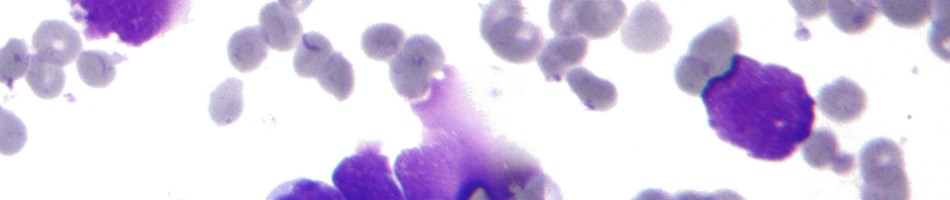

# Programming for Data Analysis

<b> Student: Lais Coletta Pereira </b>
***

## About the project

In this project for the Programming for Data Analysis course we were asked to investigate the Wisconsin Breast Cancer dataset and provide: 

<b>1)</b> Undertake an analysis/review of the dataset and present an overview and background. 

<b>2)</b> Provide a literature review on classifiers which have been applied to the dataset and
compare their performance

<b>3)</b> Present a statistical analysis of the dataset

<b>4)</b> Using a range of machine learning algorithms, train a set of classifiers on the dataset (using
SKLearn etc.) and present classification performance results. Detail your rationale for the
parameter selections you made while training the classifiers.

<b>5)</b> Compare, contrast and critique your results with reference to the literature

<b>6)</b> Discuss and investigate how the dataset could be extended – using data synthesis of new
tumour datapoints

<b>7)</b> Document your work in a Jupyter notebook

I have downloaded the Breast Cancer Wisconsin (Diagnostic) Data Set from the [Kaggle website](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/code?resource=download). 


## Dataset overview and statistical analysis
***

The Breast Cancer Wisconsin (Diagnostic) Data Set is a collection of diagnostic information on breast cancer patients, collected by <b>Dr. William H. Wolberg at the University of Wisconsin Hospitals</b>. The data set has been widely used for research and education purposes, and has been studied by many researchers in the field of machine learning and data mining.

According to this explanation by [Shashmi Karanam](https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd): "Diagnosis of breast cancer is traditionally done by a full biopsy which is an invasive surgical method. A less invasive method called Fine Needle Biopsy (FNB), allows for examination of a small amount of tissue from the tumor".

This dataset was obtained by analyzing the cell nuclei characteristics of <b>569 images </b>obtained by Fine Needle Aspiration of the breast mass. Each of the images are classified (diagnosed) as being <b>“Benign”</b> or <b>“Malignant”</b>. The first 30 attributes are numerical and represent different characteristics of the cells in the tissue samples, while the last two attributes are categorical and represent the diagnosis (malignant or benign) and the patient's name.

IMAGE

The Breast Cancer Wisconsin is often used to train machine learning models to classify whether a given breast cancer tissue sample is malignant or benign. It has also been used to study the relationship between different characteristics of the tissue samples and the diagnosis, as well as to identify patterns in the data that may be relevant to diagnosis and treatment.

Overall, this data set is a valuable resource for researchers and practitioners working on breast cancer diagnosis and treatment, and has contributed significantly to our understanding of breast cancer and the factors that influence its development and progression.

### Import Libraries and read the data
***

In [107]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
# data visualization library  
import seaborn as sns 
import matplotlib.pyplot as plt

#call a function that stops showing the warning boxes in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

# create data variable and read the data
data = pd.read_csv('data.csv')

According to the website [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) the variables definitions are: 

<b>Attribute Information:</b>

1) ID number

2) Diagnosis (M = malignant, B = benign)

<b>Ten real-valued features are computed for each cell nucleus:</b>

* radius (mean of distances from center to points on the perimeter)

* texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension ("coastline approximation" - 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [108]:
#extract the header
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [109]:
# describe the data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [110]:
column_names = data.columns 
for i in column_names:
  print('{} is unique: {}'.format(i, data[i].is_unique))

id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_mean is unique: False
radius_se is unique: False
texture_se is unique: False
perimeter_se is unique: False
area_se is unique: False
smoothness_se is unique: False
compactness_se is unique: False
concavity_se is unique: False
concave points_se is unique: False
symmetry_se is unique: False
fractal_dimension_se is unique: False
radius_worst is unique: False
texture_worst is unique: False
perimeter_worst is unique: False
area_worst is unique: False
smoothness_worst is unique: False
compactness_worst is unique: False
concavity_worst is unique: False
concave points_worst is unique: False
symmetry_worst is unique: False
fractal_dimension_worst is uni

<b>Observations: </b>
* Dataset contains: 33 columns: 32 of which are numericals where as one is object.
* The last column 'Unnamed: 32' has all the values equal to 'Nan'(count for this column is showing zero when called describe function).
* The column 'id' has unique values for each row.
* There are no empty values

In [111]:
#for the reason mentioned above I will drop the id and the Unnamed columns as they aren't adding much value to this analyis
data = data.iloc[:,1:-1]

### Data Visualization 

Using countplot we will visualize the diagnosis variable proportions:

Number of Benign:  357
Number of Malignant :  212


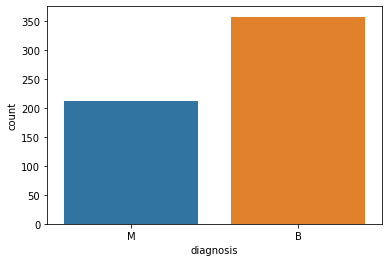

In [112]:
#reference: https://www.kaggle.com/code/ashfakyeafi/data-visualization-with-python
y = data.diagnosis         
ax = sns.countplot(y,label="Count")    
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

<b>Correlation</b>

Checking the correlation of the variables is important because they can be be input data features which have been used to forecast our target variable.

Correlation explains how one or more variables are related to each other.

In [113]:
# Extract the data correlation
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


From this table we can see the highest correlation between the variables are:
* Radius_mean and Perimeter_mean (0.99)
* Perimeter_mean and perimeter_worst (0.97)
* Area_mean and and radius_mean (0.98)
* Aream_mean and perimeter_mean (0.98)

A high correlation, however, does not necessary mean, that there is a causal relationship between these features. We shall delve deep into this later. Below we will visualize the correlations in plots, because there are many variables, I will generate pairplots divided by the mean, unique and worst values.

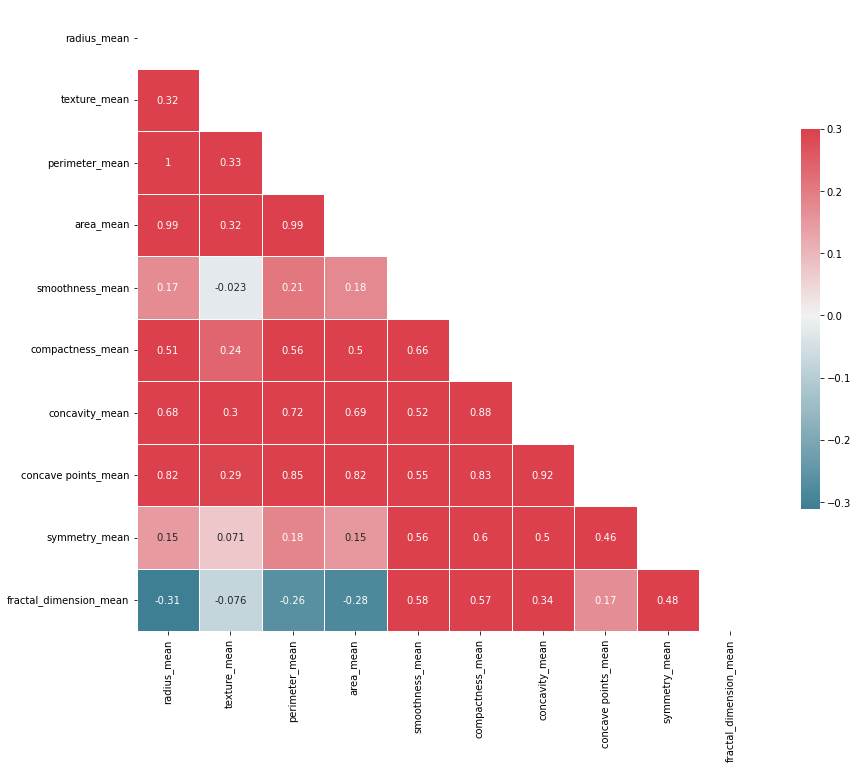

In [114]:
# Reference: https://www.kaggle.com/code/ruchirdhar/breast-cancer-wisconsin-diagnostic-analysis
# Create variable for the mean features
data_mean = data.drop(["diagnosis"], axis=1).iloc[:, 0:10]
# Compute the correlation matrix
corr1 = data_mean.corr()
# Generate heatmap more comprehensive by masking upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot= True, cbar_kws={"shrink": .5})
plt.show()

We can visualise in this heatmap that that radius_mean, perimeter_mean and area_mean feature are highly positively correlated.

Also, concavity_mean has a 0.92 correlation with concave points_mean. While concave points_mean seem to be highly positively correlated to radius, area and perimeter features; concavity mean does not. Concavity_mean and concave points_mean are also highly positvely correlated to compactness_mean

<i>Basis above analysis, shall be dropping following columns from the bCancer_mean dataframe:

perimeter_mean
area_mean
concave points_mean
compactness_mean </i>

Lets check if similar relationship exists in other dataframes as well:

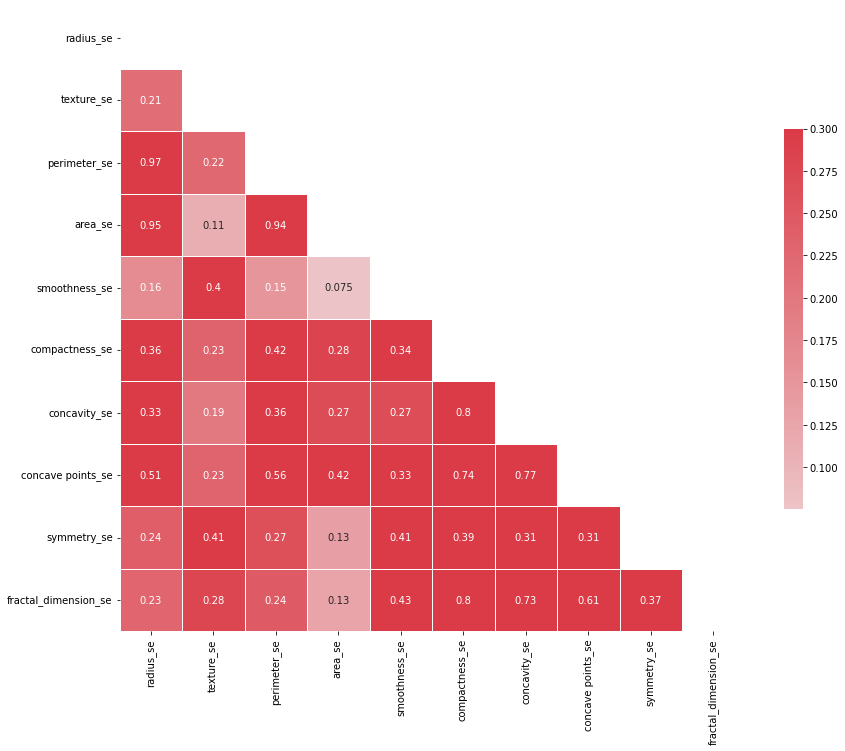

In [115]:
# Create variable for the se features
data_se = data.drop(["diagnosis"], axis=1).iloc[:, 10:20]
corr2 = data_se.corr()
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot= True, cbar_kws={"shrink": .5})
plt.show()

In the data_se dataframe the features radius, perimeter and area highly positively correlated >= 0.95
Concavity_se and compactness_se are having correlation =0.8. Compactness_se is also correlated to fractal_dimension_se with a correlation of 0.8, fractal_dimension_se correlated to concavity_se with correlation of 0.73. Concave points_se's correlation to concavity_se and compactness_se is 0.74/0.77.

<i>Basis above analysis, shall be dropping following columns from the data_mean dataframe:

perimeter_se
area_se
concave points_se
compactness_se

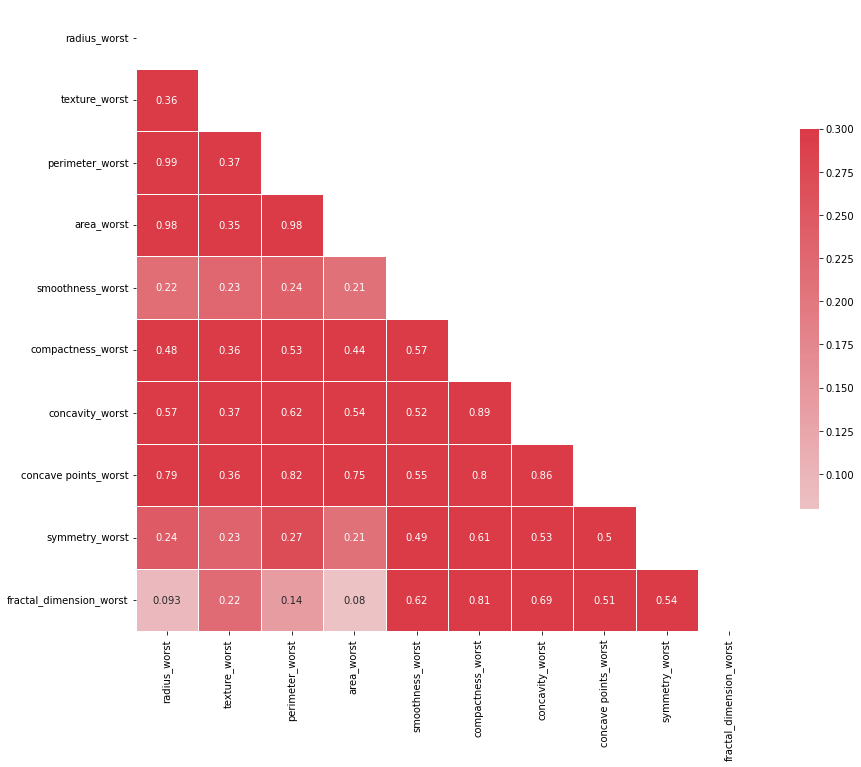

In [116]:
data_worst = data.drop(["diagnosis"], axis=1).iloc[:, 20:30]
corr3 = data_worst.corr()
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot= True, cbar_kws={"shrink": .5})
plt.show()

Similar relationship exists in the data_worst datafame, the features radius, perimeter and area highly positively correlated >= 0.98. Concavity_worst and compactness_worst have 0.89 correlation and concave points_worst and concavity_worst 0.86.

<i>therefore we shall be dropping following columns from the bCancer_mean dataframe:

perimeter_worst
area_worst
concave points_worst
compactness_worst<i>.

<b> Distribution </b>

Data distribution refers to the way that data is spread out or distributed within a dataset. The shape of a data distribution can vary widely. For example, it can be symmetrical (e.g., a normal distribution), skewed (e.g., a skewed distribution with a long tail), or bimodal (e.g., two distinct peaks). The shape of a data distribution can give insights into the underlying patterns and relationships within the data.

It is important to understand the data distribution when analyzing and working with data, as it can affect the validity and reliability of statistical inferences and analyses. For example, if a data distribution is highly skewed, it may not be appropriate to use certain statistical techniques that assume a normal distribution.

There are various techniques for visualizing data distributions, such as histograms, box plots, and density plots. These plots can help to identify patterns and features in the data and can be useful for identifying outliers or anomalies in the data. For the pupose of this analyses I will use histograms.

In [ ]:
#Reference: https://www.kaggle.com/code/vipin20/breast-cancer-classification-eda-with-score-0-99
#set histograms size
plt.figure(figsize = (20, 15))
plotnumber = 1
#drop diagnosis column
data = data.drop(["diagnosis"], axis=1)
for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## Provide a literature review on classifiers which have been applied to the dataset and compare their performance

As explained in our SKLearn lecture, classifier in machine learning is an algorithm that categorizes data into one or more of a set of “classes”. A classification model, on the other hand, is the end result of your classifier’s machine learning. The model is trained using the classifier, so that the model, ultimately, classifies your data. 

In the article ["Diagnosis of Breast Cancer Pathology on the Wisconsin Dataset with the Help of Data Mining Classification and Clustering Techniques"](https://www.hindawi.com/journals/abb/2022/6187275/) written by Walid Theib Mohammad, the following classifiers have a widespread use in biological sciences investigations and would be more appropriate to use it in this dataset: 

* Decision Tree (DT)
* Artificial Neural Networks (ANN)
* Support Vector Machines (SVM)
* Naive Bayes multinomial classifier (NBM)
* K-nearest neighbors (KNN).

For the purpose of this analysis I will refer to the journal mentioned above as we will be able to compare the classifiers based on the same parameters. 

### Decision Tree (DT)

Decision tree are called "decision trees" because they use a tree-like model of decisions to predict the class of a given data point. It is built using a recursive partitioning method, in which the data is split into smaller and smaller subsets based on a set of rules. At each step in the tree, a decision is made based on a feature in the data, and the data is split into two or more branches based on the value of that feature. For example, a decision tree for predicting the type of animal based on features such as weight and number of legs might have a decision node at the top that splits the data into two branches based on whether the animal is heavier or lighter than a certain weight.

The process of building a decision tree involves selecting the features to use and determining the best split point for each feature. This is done using an algorithm such as the ID3 (Iterative Dichotomiser 3) algorithm or the C4.5 (Classification and Regression Tree) algorithm.

Once the decision tree is built, it can be used to classify new data points by following the decision tree from the root node to a leaf node and returning the class label associated with that leaf node.

Decision tree classifiers are simple to understand and interpret, and they can handle high-dimensional data and missing values. However, they are prone to overfitting, especially if the tree becomes too deep, and they may not be as accurate as some other types of classifiers such as support vector machines or neural networks.

According to the ISVOS Journal 2018 ["Classification and Diagnostic Prediction of Breast Cancers via Different
Classifiers"](https://dergipark.org.tr/tr/download/article-file/615107) the decision tree classifier had a success rate of <b>94.74% </b>on this dataset.

IMAGE

### Artificial Neural Networks (ANN)

According to the article [Intro to Keras with breast cancer data[ANN]](https://www.kaggle.com/code/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann) by Siddharth Yadav, Artificial Neural Networks (ANNs) are a type of machine learning algorithm that are inspired by the structure and function of the human brain. They consist of a large number of interconnected "neurons" that can process and transmit information.

In an ANN, the neurons are organized into layers. The input layer receives the input data, and the output layer produces the final output. The layers in between are called hidden layers. Each neuron in the network is connected to other neurons in the next layer through a set of weights, which represent the strength of the connection between them.

To train an ANN, a large dataset is used to adjust the weights of the connections between the neurons. This is done using an optimization algorithm, such as gradient descent, which adjusts the weights to minimize the error between the predicted output and the true output.

Once the network is trained, it can be used to make predictions on new data by feeding the input data through the network and using the weights of the connections to generate an output.

ANNs are widely used in many different applications, including image and speech recognition, natural language processing, and predictive modeling. They are capable of handling complex and nonlinear relationships in data and can learn to recognize patterns and make decisions on their own. However, they can be computationally intensive to train and may require large amounts of data to learn effectively.

I will use the same journal as base for success rate for all classifiers because the author Walid Theib Mohammad used of the same parameters and optimization techniques to all classifiers. The success rate using Artificial Neural Networks (ANN) was <b>96.66%</b>.

<div>
<img src="attachment:Screenshot%202022-12-22%20at%2022.38.24.png" width="300"/>
</div>

### Support Vector Machines (SVM)

Support Vector Machines (SVMs) are a type of supervised learning algorithm used for classification and regression tasks. In the [SKLearn documentation
](https://scikit-learn.org/stable/modules/svm.html), Support Vector Machines are based on the idea of finding the hyperplane in a high-dimensional space that maximally separates different classes.

In the case of binary classification, an SVM will find the hyperplane that maximally separates the two classes, such that the distance between the nearest data points of the two classes (also known as the support vectors) is maximized. This is known as the maximum margin classifier.

In the case of multi-class classification, an SVM can be used by constructing multiple binary classifiers, one for each pair of classes, and combining their predictions.

SVMs can be used with both linear and nonlinear kernels. A linear kernel will find the hyperplane that maximally separates the classes in the high-dimensional space, while a nonlinear kernel will transform the data into a higher-dimensional space in which the classes can be separated by a hyperplane.

SVMs are popular for their ability to handle high-dimensional data and to perform well with a small number of training examples. They are also robust to overfitting, particularly when using regularization. However, they can be computationally intensive to train, especially with large datasets, and they may not perform well on datasets with large numbers of features or with many noise or outliers. Using this classifier, the success rate was <b>97.72%</b>.

IMAGE 

### Naive Bayes multinomial classifier 

On the [Geeks for geeks website](https://www.geeksforgeeks.org/naive-bayes-classifiers/) Naive Bayes classifiers is defined as a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

Bayes' theorem states that the probability of an event occurring is equal to the probability of the event given some other event (the "conditional probability") multiplied by the probability of the other event occurring, divided by the probability of the event occurring. It can be written mathematically as follows:

$$ P(A|B) = \frac {P(B|A) * P(A)}  {P(B)}\ $$

Where:
P(A|B) is the probability of event A occurring given that event B has occurred (the "conditional probability" of A given B)
P(B|A) is the probability of event B occurring given that event A has occurred (the "conditional probability" of B given A)
P(A) is the probability of event A occurring
P(B) is the probability of event B occurring

According to the article writen by Walid Theib Mohammad mentioned above, Naive Bayes despite its ease of use, may not always yield good results because:
- It is possible that qualities are not mutually exclusive. Feature subsets can be employed in this situation; 
- This method is unable to deal with values that are not discrete. Intervals are needed to break up the continuous data. 
- The solutions are difficult to implement, and the way these solutions are applied has a significant impact on the outcomes. 

The number of samples classified correctly using Naive Bayes is <b>92.97%</b>, and 529 out of 569 samples were classified correctly. 

<div>
<img src="attachment:Naive.png" width="300"/>
</div>


### K-nearest neighbors (KNN)

As discussed in our classifier lecture, K-nearest neighbors (KNN) is a type of algorithm that stores all of the training data and predicts the label of a new data point based on the labels of its nearest neighbors.

IMAGE

In the case of classification, the KNN algorithm assigns the new data point to the class that is most common among its K nearest neighbors, where K is a positive integer that represents the number of neighbors to consider. In the case of regression, the KNN algorithm predicts the value of the new data point based on the mean or median value of its K nearest neighbors.

The distance between data points is usually measured using a distance metric such as Euclidean distance or Manhattan distance. The value of K is usually chosen using cross-validation or by considering the size of the training dataset and the complexity of the task.

KNN is a simple and effective method for classification and regression tasks, and it is easy to implement and interpret. It is sensitive to the choice of K and to the distance metric used, and it can be computationally expensive to find the nearest neighbors for large datasets. It is also sensitive to the presence of noise and outliers in the data.

The success rate using K-nearest neighbors (KNN) was <b>95.95%</b>.

IMAGE

### Conclusion

According to the journal ["Classification and Diagnostic Prediction of Breast Cancers via Different
Classifiers"](https://dergipark.org.tr/tr/download/article-file/615107) the highest successful rate was 97.7% percent using the Support Vector Machines (SVM) classifier. This method was followed by multilayer perceptron, KNN, Decision tree, and Naive Bayes. 

IMAGE

Even though I based the classifiers explanations in this journal, there are other sources that would give different results, for example, in the journal [Classification and Diagnostic Prediction of Breast Cancers via Different
Classifiers](https://dergipark.org.tr/tr/download/article-file/615107) the most successful results were using multilayer perceptron method with a value of 99.8% and KNN method 99.1%. Some of the reasons why this happens could be because values set before training are different, use of boosting and bagging ensemble methods or using a different model to fit the data. 

## Createa test and a training set and present classification performance results.

It is essential to create a train-test split when working on any artificial intelligence problem, as this allows you to evaluate the performance of your model on unseen data and helps prevent overfitting. Without a train-test split, it is not possible to accurately assess the generalizability of your model or determine whether it has learned patterns in the data that are specific to the training set rather than the underlying structure of the problem.

In [ ]:
# libraries
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


# create the inputs and outputs variables
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#splitting data into training and testing set(80/ 20)
#fit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### Test different classifiers - SMV

In [ ]:
# Classifier
svm = svm.SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict
svm_prediction = svm.predict(X_test)
svm_prediction

In [ ]:
# Evaluate
svm_acc = accuracy_score(y_test,svm_prediction)

print("Accuracy score:",svm_acc)

#### multilayer perceptron

In [ ]:
# Source: https://www.kaggle.com/code/advikmaniar/breast-cancer-classification-8-models-98-25-acc
# Classifier
classifier = MLPClassifier(random_state=1,hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam')
classifier.fit(x_train, y_train)

#Predict
y_prediction = classifier.predict(X_test)
y_predicition


In [ ]:
# Evaluate
mlp_acc = accuracy_score(y_test,y_prediction)

print("Accuracy score:",mlp_acc)

#### KNN

In [ ]:
# Classifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train, y_train)

# Predict
KNN_predictions = KNN.predict(X_test)
KNN_predictions

In [ ]:
# Evaluate
KNN_acc = accuracy_score(y_test,KNN_predictions)

print("Accuracy score:",KNN_acc)

#### Decision tree

In [ ]:
#Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
dt_predictions = dt.predict(X_test)
dt_predictions

In [ ]:
# Evaluate
dt_acc = accuracy_score(y_test,dt_predictions)

print("Accuracy score:",dt_acc)

#### Naive Bayes

In [ ]:
Gnb = GaussianNB() 
Gnb.fit(X_train, y_train) 

Gnb_predictions = Gnb.predict(X_test)
Gnb_predictions

In [ ]:
Gnb_acc = accuracy_score(y_test,Gnb_predictions)

print("Accuracy score:",Gnb_acc)

## Compare, contrast and critique your results with reference to the literature

#### Classifier
#### Fit
#### Predict
#### Evaluate

In [ ]:
test 

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into training and test set


References: 

Information about the dataset: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Data set variables information: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/code?resource=download

Analysis about breast cancer types and dataset: https://medium.com/@shashmikaranam/exploratory-data-analysis-breast-cancer-wisconsin-diagnostic-dataset-6a3be9525cd

Histogram references: https://www.kaggle.com/code/ashfakyeafi/data-visualization-with-python

Pairplot interpretation and generation: https://pythonbasics.org/seaborn-pairplot/

Correlation plots reference: https://www.kaggle.com/code/ruchirdhar/breast-cancer-wisconsin-diagnostic-analysis

Classifiers definitions and introduction: https://monkeylearn.com/blog/what-is-a-classifier/

Classifiers journal by Walid Theib Mohammad: https://www.hindawi.com/journals/abb/2022/6187275/

Decision Tree references: https://dergipark.org.tr/tr/download/article-file/615107

Histograms and distribution: https://www.kaggle.com/code/vipin20/breast-cancer-classification-eda-with-score-0-99

Artificial Neural Networks: https://scikit-learn.org/stable/modules/svm.html

Naive Bayes multinomial classifier: https://www.geeksforgeeks.org/naive-bayes-classifiers/

K-nearest neighbors (KNN): https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
